In [9]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data_multimodal_train = pd.read_csv("dane_nn6/multimodal-sparse-training.csv")
X_multimodal_train = data_multimodal_train[['x']].values.reshape(-1, 1)
y_multimodal_train = data_multimodal_train['y'].values.reshape(-1, 1)

data_multimodal_test = pd.read_csv("dane_nn6/multimodal-sparse-test.csv")
X_multimodal_test = data_multimodal_test[['x']].values.reshape(-1, 1)
y_multimodal_test = data_multimodal_test['y'].values.reshape(-1, 1)

data_rings3_train = pd.read_csv("dane_nn6/rings3-balance-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn6/rings3-balance-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_rings5_train = pd.read_csv("dane_nn6/rings5-sparse-training.csv")
X_rings5_train = data_rings5_train[['x', 'y']].values.reshape(-1, 2)
y_rings5_train = data_rings5_train['c'].values.reshape(-1, 1)

data_rings5_test = pd.read_csv("dane_nn6/rings5-sparse-test.csv")
X_rings5_test = data_rings5_test[['x', 'y']].values.reshape(-1, 2)
y_rings5_test = data_rings5_test['c'].values.reshape(-1, 1)

data_xor3_train = pd.read_csv("dane_nn6/xor3-balance-training.csv")
X_xor3_train = data_xor3_train[['x', 'y']].values.reshape(-1, 2)
y_xor3_train = data_xor3_train['c'].values.reshape(-1, 1)


In [3]:
def plot_classification_results(X_test, y_test, y_pred, title='Classification Results'):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    
    # Identify misclassified points
    misclassified = y_pred != y_test
    
    # Plot correctly classified points
    scatter = plt.scatter(X_test[~misclassified, 0], X_test[~misclassified, 1], 
                          c=y_test[~misclassified], cmap='viridis')
    
    # Plot misclassified points
    plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1],
                color='red', marker='x', s=100, 
                label='Misclassified')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

In [60]:
nn_multimodal = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 6210.43


Training: 100%|████████████████████████████████████████████████████████████████████| 100000/100000 [00:45<00:00] , Loss:  Current:47.9477,Best:47.2893


Training complete. Final loss: 47.2893


In [61]:
nn_multimodal_l1 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal_l1.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1,
            regularization="l1", reg_lambda=0.01)

Starting loss: 6186.15


Training: 100%|██████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00] , Loss:  Current:154.0649,Best:151.9106


Training complete. Final loss: 151.9106


In [62]:
nn_multimodal_l2 = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 64, 32, 1],
                              activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_multimodal_l2.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1,
            regularization="l2", reg_lambda=1e-4)

Starting loss: 6255.86


Training: 100%|████████████████████████████████████████████████████████████████████| 100000/100000 [00:48<00:00] , Loss:  Current:33.6940,Best:33.6940


Training complete. Final loss: 33.6940


MSE Multimodal: 47.289340047024815
MSE Multimodal L1: 100.3085465501091
MSE Multimodal L2: 31.072444213833087


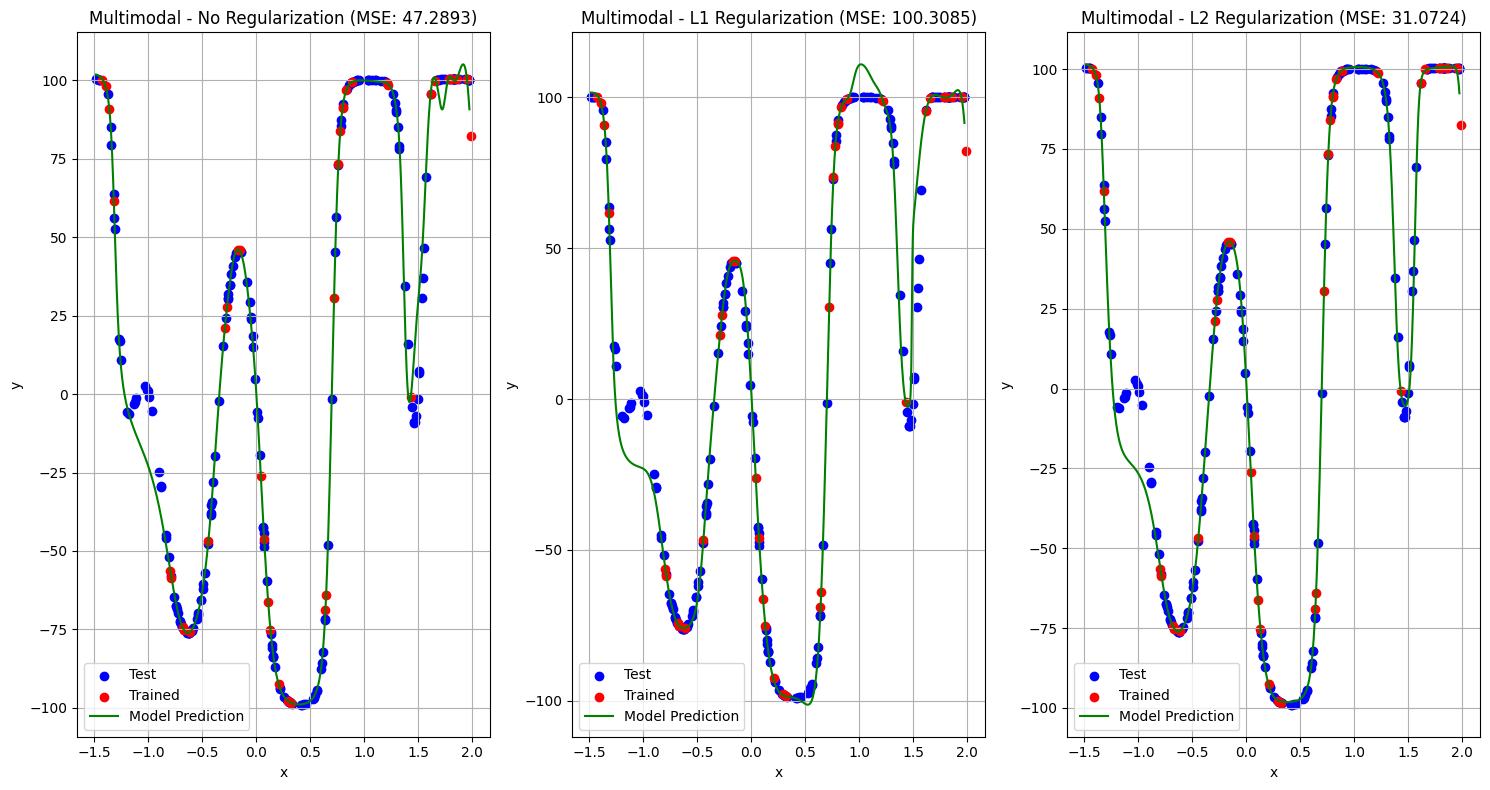

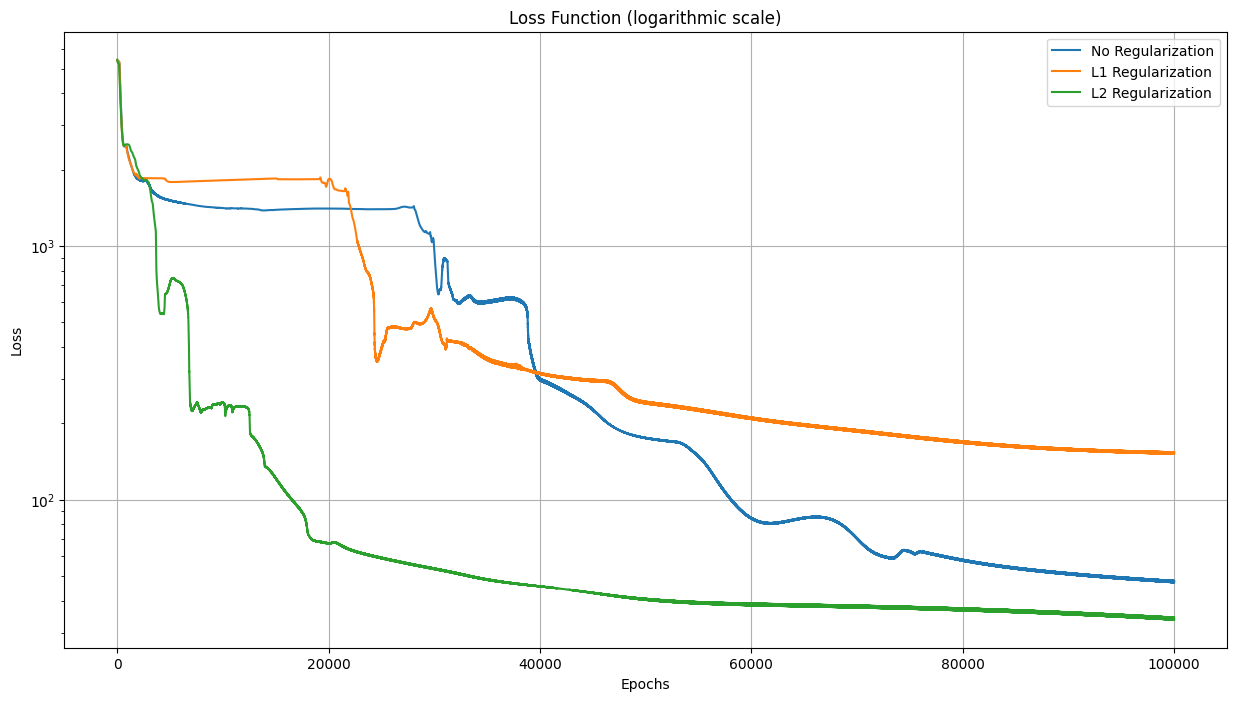

In [ ]:
loss_mult = np.mean((nn_multimodal.predict(X_multimodal_test) - y_multimodal_test) ** 2)
loss_mult_l1 = np.mean((nn_multimodal_l1.predict(X_multimodal_test) - y_multimodal_test) ** 2)
loss_mult_l2 = np.mean((nn_multimodal_l2.predict(X_multimodal_test) - y_multimodal_test) ** 2)

print("MSE Multimodal:", loss_mult)
print("MSE Multimodal L1:", loss_mult_l1)
print("MSE Multimodal L2:", loss_mult_l2)

x = np.linspace(np.min(X_multimodal_test), np.max(X_multimodal_test), 1000).reshape(-1, 1)

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - No Regularization' + f' (MSE: {loss_mult:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.subplot(1, 3, 2)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal_l1.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - L1 Regularization' + f' (MSE: {loss_mult_l1:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.subplot(1, 3, 3)
plt.scatter(X_multimodal_test, y_multimodal_test, c='blue', label='Test')
plt.scatter(X_multimodal_train, y_multimodal_train, c='red', label='Train')
plt.plot(x, nn_multimodal_l2.predict(x), c='green', label='Model Prediction')
plt.title('Multimodal - L2 Regularization' + f' (MSE: {loss_mult_l2:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

loss = nn_multimodal.model_history()
loss_l1 = nn_multimodal_l1.model_history()
loss_l2 = nn_multimodal_l2.model_history()

plt.figure(figsize=(15, 8))
plt.plot(loss, label='No Regularization')
plt.plot(loss_l1, label='L1 Regularization')
plt.plot(loss_l2, label='L2 Regularization')
plt.title('Loss Function (logarithmic scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]

In [73]:
nn_rings3 = NeuralNetwork(X_rings3_train, y_rings3_train, [input_size, 32, 32, output_size],
                            activation_fun="sigmoid", output_activation="softmax", loss_fun="crossentropy")
nn_rings3.train(epochs=int(1e5), learning_rate=0.001, validation_data=(X_rings3_test, y_rings3_test),
            mini_batch=True, batch_size=8, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 1.08


Training:   1%|▌                                                                    | 854/100000 [00:31<1:00:28] , Loss:  Current: 3.0298,Best: 1.1894


KeyboardInterrupt: 